# Importing all required libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam

# Reseting all previous graphs or data

In [2]:
tf.reset_default_graph()

# Loading the data

In [3]:
(mnist_train_inputs,mnist_train_targets),(mnist_test_inputs,mnist_test_targets)=mnist.load_data()

# Showing the image against it's image number (0-59999) training range (0-9999) testing range

3


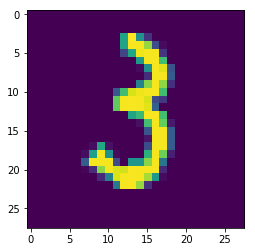

In [4]:
print(mnist_train_targets[1234]) #60000 number of 0-9 all type dimension (60000,)
plt.imshow(mnist_train_inputs[1234])

# reshaping from (xxxxx,28,28) to (xxxxx,784) xxxxx=60000 or 10000

In [5]:
train_inputs=mnist_train_inputs.reshape(mnist_train_inputs.shape[0],mnist_train_inputs.shape[1]*mnist_train_inputs.shape[2])
test_inputs=mnist_test_inputs.reshape(mnist_test_inputs.shape[0],mnist_test_inputs.shape[1]*mnist_test_inputs.shape[2])

# Converting all data points into float32

In [6]:
train_inputs=train_inputs.astype('float32')
test_inputs=test_inputs.astype('float32')

# Ranging all the datapoints between 0 to 1 by dividing it by 255(max value possible for each data places)

In [7]:
train_inputs /= 255
test_inputs /=255

# One-Hot encoding to the targets of all datasets

In [8]:
train_targets=keras.utils.to_categorical(mnist_train_targets,10)
test_targets=keras.utils.to_categorical(mnist_test_targets,10)

# Showing the image after One-Hot encoding

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


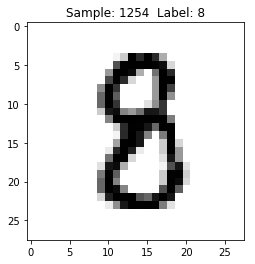

In [ ]:
def display_sample(num):
    print(train_targets[num])   #Print the one-hot array of this sample's label 
    label = np.argmax(train_targets[num]) #Print the maximum number position in One-Hot encoded list
    image = train_inputs[num].reshape([28,28])  #Reshape the 768 1d values to a 28x28 image for showing
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.cm.binary) #in black and white format
    plt.show()
    
display_sample(1254)

# Creating our model architecture neurone_number=(2^8)*2=256*2

In [ ]:
model = Sequential() 
model.add(Dense(512, activation='relu', input_shape=(784,))) #input layer densely connected
#model.add(Dropout(0.2)) # 1st hidden layer dropping 20% neorones with same config
model.add(Dense(512, activation='relu')) #1st hidden layer
model.add(Dense(512, activation='relu')) #2nd hidden layer
model.add(Dropout(0.2)) #3rd hidden layer dropping 20% neorones with same config
model.add(Dense(10, activation='softmax')) #output layer

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# Adding loss function optimizer and score matrices in our model

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

# Training the model with batch_size=100 epochs=10 verbos=2(good for ipython notebook) test dataset as validation data

In [ ]:
model.fit(train_inputs,train_targets,batch_size=100,epochs=10,verbose=2,validation_data=(test_inputs,test_targets))

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
 - 23s - loss: 0.2067 - acc: 0.9383 - val_loss: 0.0996 - val_acc: 0.9672
Epoch 2/10
 - 21s - loss: 0.0859 - acc: 0.9732 - val_loss: 0.0887 - val_acc: 0.9713
Epoch 3/10
 - 21s - loss: 0.0579 - acc: 0.9822 - val_loss: 0.0768 - val_acc: 0.9766
Epoch 4/10
 - 21s - loss: 0.0448 - acc: 0.9858 - val_loss: 0.0735 - val_acc: 0.9769
Epoch 5/10
 - 21s - loss: 0.0346 - acc: 0.9891 - val_loss: 0.0825 - val_acc: 0.9782
Epoch 6/10
 - 21s - loss: 0.0322 - acc: 0.9893 - val_loss: 0.0880 - val_acc: 0.9777
Epoch 7/10
 - 22s - loss: 0.0254 - acc: 0.9919 - val_loss: 0.0670 - val_acc: 0.9808
Epoch 8/10
 - 21s - loss: 0.0223 - acc: 0.9934 - val_loss: 0.0895 - val_acc: 0.9779
Epoch 9/10
 - 21s - loss: 0.0201 - acc: 0.9934 - val_loss: 0.0901 - val_acc: 0.9780
Epoch 10/10


# Measuring test accuracy measures

In [ ]:
score = model.evaluate(test_inputs, test_targets, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Number of missing value count

In [ ]:
num_of_missing_value=((100-(score[1]*100))/100) * test_inputs.shape[0]
num_of_missing_value = num_of_missing_value.astype('int')
print('missing values in 10000 samples = '+str(num_of_missing_value))

# Saving the model

In [ ]:
model.save('mnist_the_number_reader.model')

# Loading the model

In [ ]:
model=keras.models.load_model('mnist_the_number_reader.model')

# Scanning an image using its sequence number and predcting it

In [ ]:
def predict_value(num):
    num %=test_inputs.shape[0]
    predictions=model.predict([[test_inputs[num,:]]]) #a list of 10 elements
    print('%d th image '%(num))
    print('Predicted : '+str(np.argmax(predictions)))
    plt.imshow(mnist_test_inputs[num])
    plt.show()

In [ ]:
predict_value(9)